In [16]:
from __future__ import division
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [20]:
#import excel file containing data summary

wtpdata = pd.read_csv(r'old_wtp_data.csv', encoding='utf-8-sig')
#wtpdata = pd.read_excel(r'wtp_taskdata_NEW.xlsx')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)

                 participant  avg_spent_social  avg_spent_nonsocial  \
0   549ea92efdf99b4ffa5fa208          0.032000             0.030333   
1   55a43687fdf99b7da1908e0f          0.018889             0.018261   
2   55ea70c37480920010aa9982          0.031000             0.029250   
3   566c9284d408ea000519c6d7          0.018889             0.017826   
4   56f745653bd969000d170c15          0.033333             0.028929   
5   57e972d7c3e5930001447bb1          0.030000             0.028235   
6   58ab75c4ef58a9000119d16c          0.023684             0.022667   
7   5c510d1310223b00012fa23e          0.028684             0.025000   
8   5cb33d40f173240019513957          0.022593             0.020000   
9   5cc166b25899270017dd60e2          0.032174             0.028889   
10  5cfecc1e96681500168a1799          0.038696             0.036667   
11  5d305152b2cfe00019231a2a          0.029231             0.025833   
12  5da23c68cf775d001724d361          0.016957             0.019259   
13  5d

In [21]:
socialavg = wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))



group mean: 0.030123467623
standard error of the mean: 0.000746490936


In [22]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences
nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.027941780565
standard error of the mean: 0.000666035054


In [23]:
#sample size
n = len(wtpdata)
print(n)

69


In [24]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0009421381541408375 0.15053640700000004
0.0030042000580449133


In [25]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)


# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)


# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

0.00036166318682805424
6.032372487521811
68


In [26]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=6.032, df=68, cv=1.668, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


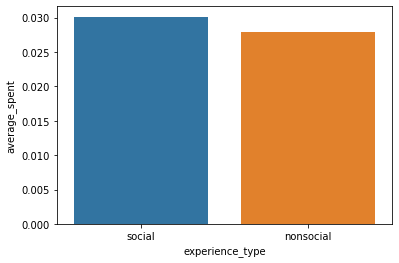

In [27]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)


In [28]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.3712770501780883


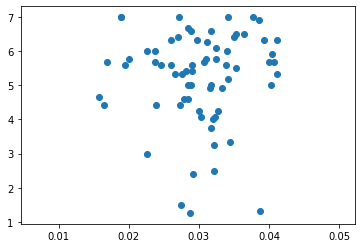

[[3.84501615e-05 2.35106516e-04]
 [2.35106516e-04 1.85765961e+00]]
Pearsons correlation: 0.028
p value: 0.8205
Accept null hypothesis that the means are equal.


In [29]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support


#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')



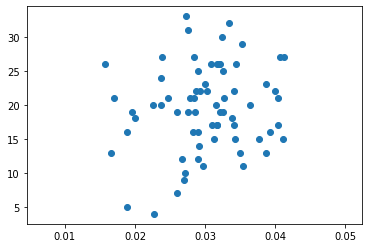

[[3.84501615e-05 6.09045401e-03]
 [6.09045401e-03 3.95464621e+01]]
Pearsons correlation: 0.156
p value: 0.2000
Accept null hypothesis that the means are equal.


In [30]:
#amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

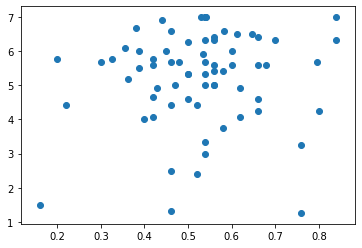

[[0.01915659 0.01670932]
 [0.01670932 1.85765961]]
Pearsons correlation: 0.089
p value: 0.4692
Accept null hypothesis that the means are equal.


In [31]:
##### prop of chosen social // self report #####
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

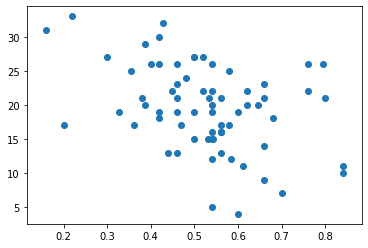

[[ 1.91565920e-02 -3.42379298e-01]
 [-3.42379298e-01  3.95464621e+01]]
Pearsons correlation: -0.393
p value: 0.0008
Reject the null hypothesis that the means are equal.


In [32]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

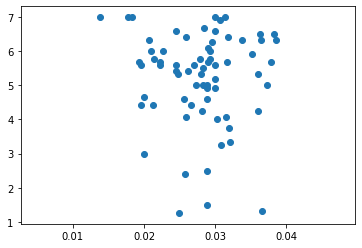

[[ 3.06085858e-05 -4.80691503e-04]
 [-4.80691503e-04  1.85765961e+00]]
Pearsons correlation: -0.064
p value: 0.6028
Accept null hypothesis that the means are equal.


In [33]:
##### avg spent on nonsocial // self report #####
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

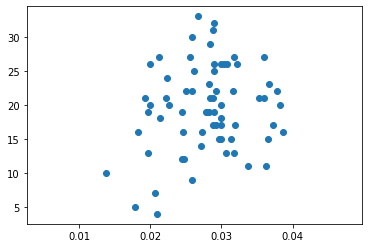

[[3.06085858e-05 6.21326080e-03]
 [6.21326080e-03 3.95464621e+01]]
Pearsons correlation: 0.179
p value: 0.1421
Accept null hypothesis that the means are equal.


In [34]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


In [35]:
prop_socialavg= wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))

mean: 0.526219992058


In [37]:
prop_nonsocialavg= wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))


mean: 0.473780007942


In [38]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

5.400339712761417 3.618358904


In [39]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.2768146818326052


In [40]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.033324571619083955


In [41]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

1.5736131499410246
68


In [42]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=1.574, df=68, cv=1.668, p=0.120
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


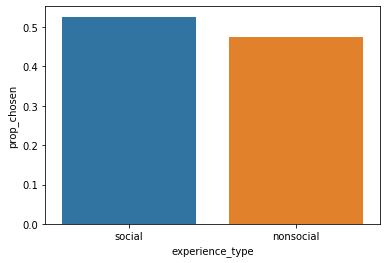

In [43]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.prop_chosen, data=wtp_means)


In [45]:
###################################
#### t stats for sums #####


In [46]:
social_sum= wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))


mean: 0.786521739130


In [47]:
nonsocial_sum= wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))

mean: 0.654057971014


In [48]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)


12.063599999999992 9.14


In [49]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.3995011808754594


In [50]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.04809429046846436


In [51]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

2.75425142622281


In [52]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

68


In [53]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=2.754, df=68, cv=1.668, p=0.008
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


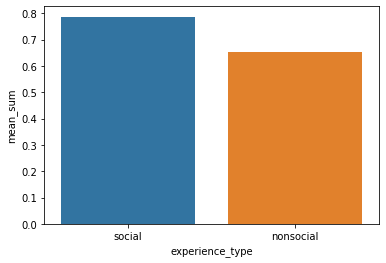

In [54]:
wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [social_sum_M, nonsocial_sum_M]})

wtp_plot = sns.barplot(x=wtp_sum_means.experience_type, y=wtp_sum_means.mean_sum, data=wtp_sum_means)


In [55]:
#### sum // self-report ####


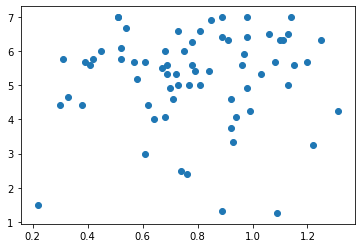

[[0.06697008 0.02149457]
 [0.02149457 1.85765961]]
Pearsons correlation: 0.061
p value: 0.6189
Accept null hypothesis that the means are equal.


In [56]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(social_sum, mspss)
pyplot.show()
covariance = cov(social_sum, mspss)
print(covariance)
corr, _ = pearsonr(social_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

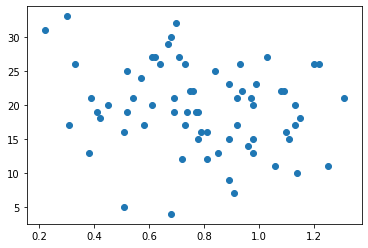

[[ 0.06697008 -0.33707801]
 [-0.33707801 39.54646206]]
Pearsons correlation: -0.207
p value: 0.0877
Reject the null hypothesis that the means are equal.


In [57]:
#sum of social / aq
pyplot.scatter(social_sum, aq)
pyplot.show()
covariance = cov(social_sum, aq)
print(covariance)
corr, _ = pearsonr(social_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

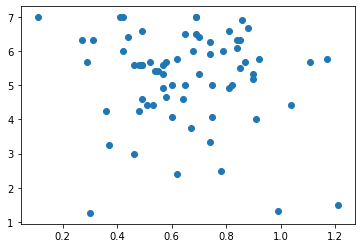

[[ 0.04870976 -0.03621874]
 [-0.03621874  1.85765961]]
Pearsons correlation: -0.120
p value: 0.3244
Accept null hypothesis that the means are equal.


In [58]:
#sum of nonsocial / mulitdimensional scale of perceived social support
pyplot.scatter(nonsocial_sum, mspss)
pyplot.show()
covariance = cov(nonsocial_sum, mspss)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

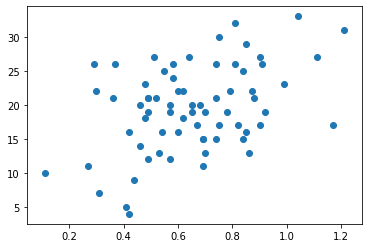

[[ 0.04870976  0.57999787]
 [ 0.57999787 39.54646206]]
Pearsons correlation: 0.418
p value: 0.0004
Reject the null hypothesis that the means are equal.


In [59]:
#sum of nonsocial  / aq
pyplot.scatter(nonsocial_sum, aq)
pyplot.show()
covariance = cov(nonsocial_sum, aq)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')